In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:\\Users\pooja\OneDrive\Desktop\Fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# checking for missing values
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [4]:
# No null values present

In [5]:
# looking at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [7]:
#Deleting the column step as it has no relation with an transaction being fraud or not
data= data.drop(columns=['step'])

In [8]:
#Dividing the data into numerical and categorical data
n_data = data [['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest']]
c_data = data [['type', 'isFraud', 'isFlaggedFraud']]

In [9]:
#Analysis of categorical data

<function matplotlib.pyplot.show(close=None, block=None)>

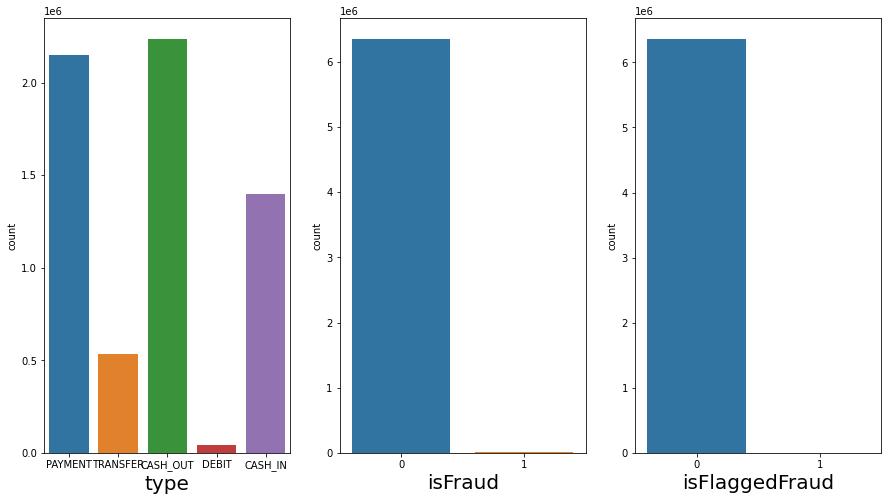

In [10]:
#Data Visualisation
#Univariate Analysis

plt.figure(figsize=(15,8))
plotnumber = 1
for column in c_data:
    if plotnumber <=4:
        ax= plt.subplot(1,3,plotnumber)
        sns.countplot(c_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [11]:
# From the above graphs we observe very few transactions are debt transaction
#Also Fraud transcation are few compared to not fraud implies the data set is imbalanced

In [12]:
#checking for unique categoriesz
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : type
------------------------------------------
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


Column Name        : isFraud
------------------------------------------
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


Column Name        : isFlaggedFraud
------------------------------------------
0    99.999749
1     0.000251
Name: isFlaggedFraud, dtype: float64




In [13]:
#Dropping Flagged Fraud column from data as it looks same as isFraud column
data = data.drop(columns= ['isFlaggedFraud'])

<function matplotlib.pyplot.show(close=None, block=None)>

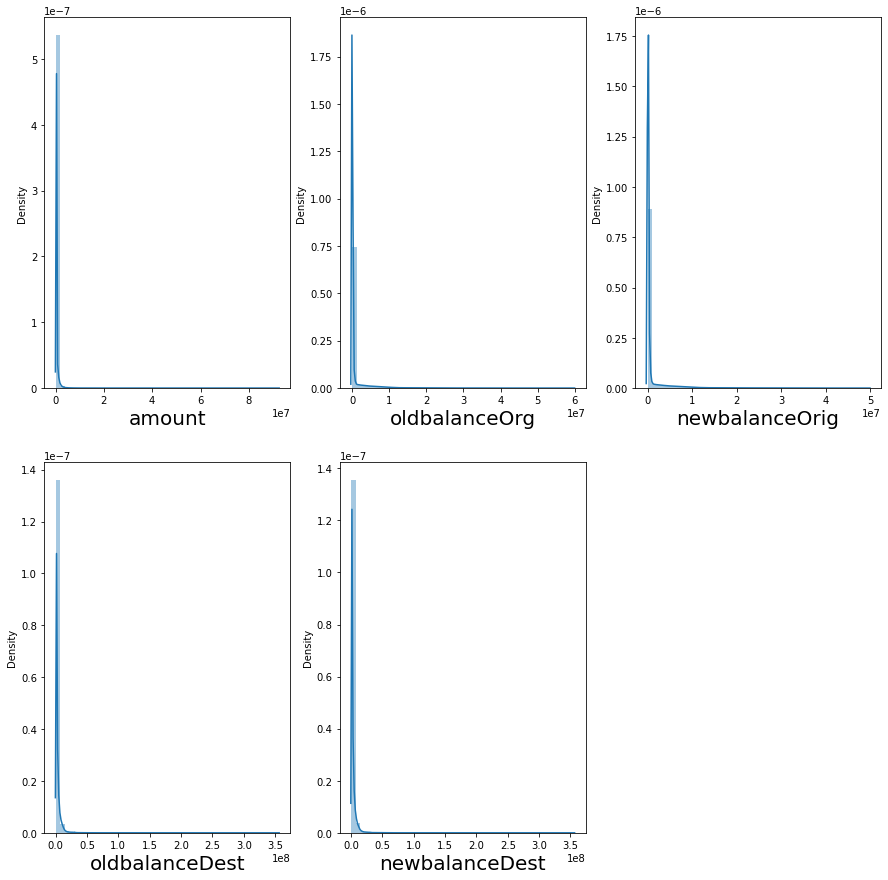

In [14]:
#Analysing numerical data
plt.figure(figsize=(15,15))
plotnumber = 1
for column in n_data:
    if plotnumber <=5:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [15]:
#Data looks skewed
#Lets check for skewness
n_data.skew()

amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64

In [16]:
# above data looks highly skewed this could be due to outliers
#lets encode the categorical data have a look at the outliers and try to correct the skewness

In [17]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [18]:
data

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0
1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0
2,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1
3,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1
4,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...
6362615,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1
6362616,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1
6362617,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1
6362618,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1


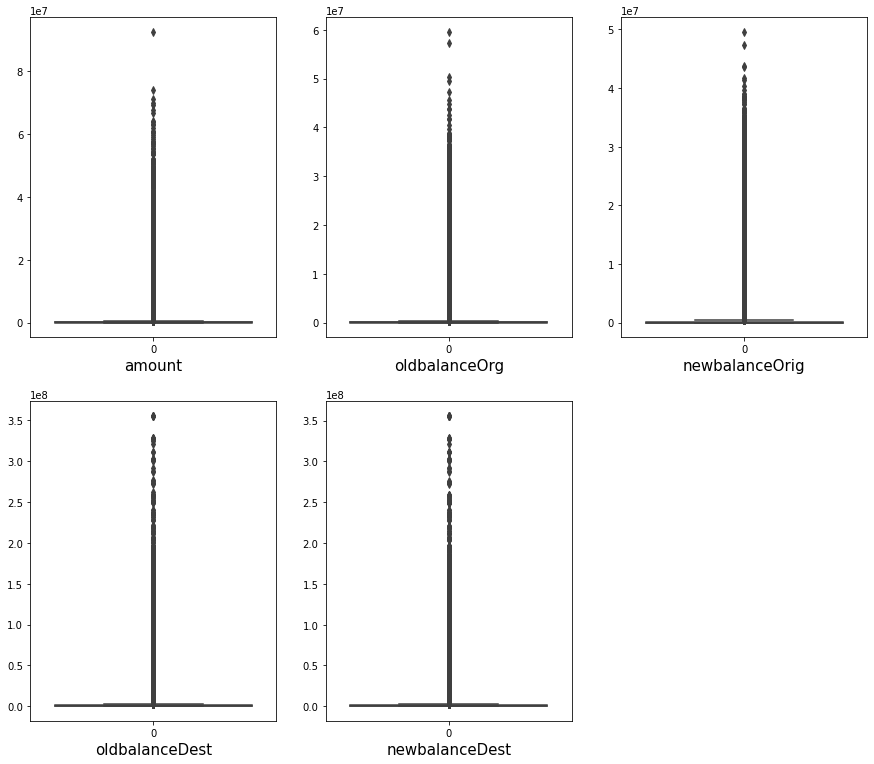

In [19]:
# data is encoded
# Visualising outliers using box plot
# Checking for outliers using boxplot
plt.figure(figsize=(15,20))
graph =1
for column in n_data:
    if graph <=7:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [20]:
# Above plots show too many outliers will use Power Transformer for scaling data and dealing with outliers

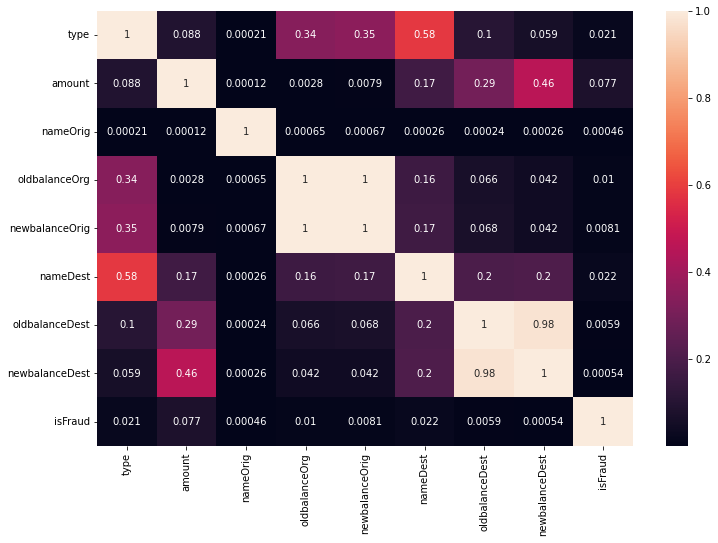

In [21]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [22]:
# from the above heatmap molticollinearity is oberved in columns:
#(oldbalorg and newbalorg) and (oldbaldest and newbaldest)
# also the above columns have a very weak relation with the label

In [23]:
# Using Power Transformer to deal with above issues of outliers and then checking vifs to deal with multicollinearity  

In [24]:
#Dividing data into features and label

X = data.drop(columns=['isFraud'])
Y= data['isFraud']

In [25]:
# Using Power Transform to Sclae the data and also treat outliers
scaler = PowerTransformer()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0.962058,-0.953597,-1.363264,0.798937,1.113517,1.228507,-1.134046,-1.224196
1,0.962058,-1.668501,-0.431554,0.377991,0.889466,1.276311,-1.134046,-1.224196
2,1.475525,-2.469598,-1.181073,-0.478452,-0.863820,-0.075262,-1.134046,-1.224196
3,-0.387603,-2.469598,1.331794,-0.478452,-0.863820,-0.172189,0.220117,-1.224196
4,0.962058,-0.872529,0.236471,0.510405,0.938581,0.500819,-1.134046,-1.224196
...,...,...,...,...,...,...,...,...
6362615,-0.387603,1.094453,1.255919,0.945695,-0.863820,0.045553,-1.134046,0.575610
6362616,1.475525,3.516484,-0.697790,1.606241,-0.863820,-0.494624,-1.134046,-1.224196
6362617,-0.387603,3.516484,-1.546217,1.606241,-0.863820,-1.105113,0.416984,1.263037
6362618,1.475525,1.771227,-0.395240,1.145886,-0.863820,-0.336855,-1.134046,-1.224196


In [26]:
#checking for skewness
X_scaled.skew()

type             -0.095861
amount           -0.019257
nameOrig         -0.291611
oldbalanceOrg    -0.089773
newbalanceOrig    0.333589
nameDest         -0.027315
oldbalanceDest   -0.162575
newbalanceDest   -0.277178
dtype: float64

In [27]:
# Skewness is less than +/_ 0.5 for all features

In [28]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,2.185489,type
1,2.056000,amount
2,1.000001,nameOrig
3,2.801600,oldbalanceOrg
4,3.401611,newbalanceOrig
5,2.462875,nameDest
6,5.948942,oldbalanceDest
7,7.403545,newbalanceDest


In [29]:
#Since vif is less than 10 data looks good

In [30]:
# Balancing the target column "isFraud" using SMOTE on training data
from imblearn.over_sampling import SMOTE

In [31]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.30, random_state = 285)

In [32]:
x_train_rs,y_train_rs= SMOTE().fit_resample(x_train,y_train)

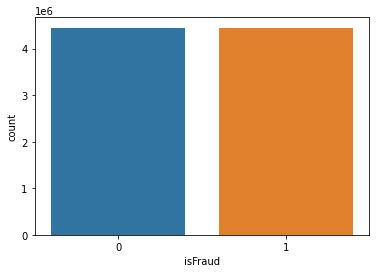

In [33]:
sns.countplot(y_train_rs)
plt.show()

In [34]:
# the target column of training data is balanced

In [35]:
# Model Selection
def model_selection (algorithm, x_train_rs,y_train_rs,x_test,y_test):
    algorithm.fit(x_train_rs,y_train_rs)
    pred_train = algorithm.predict(x_train_rs)
    pred_test = algorithm.predict(x_test)
    
    print ("Acuraccy of training model :",accuracy_score(y_train_rs,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :\n",classification_report(y_train_rs,pred_train))
    print ("Classification report of test data :\n ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))
    print ("\n -------------------------------------------------------------\n")

In [37]:
#Logistic Regression
lg= LogisticRegression()
rf= RandomForestClassifier(n_estimators=25, max_depth = 15, min_samples_leaf = 250, min_samples_split = 500)
svc= SVC(max_iter = 25)

In [38]:
model_selection(lg,x_train_rs,y_train_rs,x_test,y_test)


Acuraccy of training model : 0.9393593819448082
Accuracy of testing model : 0.9261310592177436
Classification report of training data :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94   4448017
           1       0.93      0.95      0.94   4448017

    accuracy                           0.94   8896034
   macro avg       0.94      0.94      0.94   8896034
weighted avg       0.94      0.94      0.94   8896034

Classification report of test data :
                precision    recall  f1-score   support

           0       1.00      0.93      0.96   1906390
           1       0.02      0.95      0.03      2396

    accuracy                           0.93   1908786
   macro avg       0.51      0.94      0.50   1908786
weighted avg       1.00      0.93      0.96   1908786

Confusion Matrix 
 [[1765520  140870]
 [    130    2266]]

 -------------------------------------------------------------



In [39]:
model_selection(rf,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.9940145237754262
Accuracy of testing model : 0.98957242980617
Classification report of training data :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99   4448017
           1       0.99      1.00      0.99   4448017

    accuracy                           0.99   8896034
   macro avg       0.99      0.99      0.99   8896034
weighted avg       0.99      0.99      0.99   8896034

Classification report of test data :
                precision    recall  f1-score   support

           0       1.00      0.99      0.99   1906390
           1       0.11      0.99      0.19      2396

    accuracy                           0.99   1908786
   macro avg       0.55      0.99      0.59   1908786
weighted avg       1.00      0.99      0.99   1908786

Confusion Matrix 
 [[1886510   19880]
 [     24    2372]]

 -------------------------------------------------------------



In [40]:
model_selection(svc,x_train_rs,y_train_rs,x_test,y_test)

Acuraccy of training model : 0.6662118197839622
Accuracy of testing model : 0.8707309253106424
Classification report of training data :
               precision    recall  f1-score   support

           0       0.62      0.87      0.72   4448017
           1       0.78      0.46      0.58   4448017

    accuracy                           0.67   8896034
   macro avg       0.70      0.67      0.65   8896034
weighted avg       0.70      0.67      0.65   8896034

Classification report of test data :
                precision    recall  f1-score   support

           0       1.00      0.87      0.93   1906390
           1       0.00      0.48      0.01      2396

    accuracy                           0.87   1908786
   macro avg       0.50      0.67      0.47   1908786
weighted avg       1.00      0.87      0.93   1908786

Confusion Matrix 
 [[1660894  245496]
 [   1251    1145]]

 -------------------------------------------------------------



<function matplotlib.pyplot.show(close=None, block=None)>

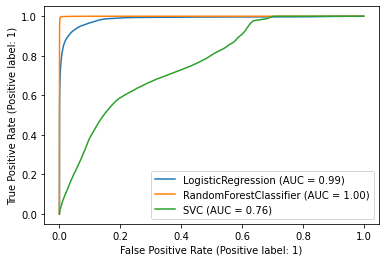

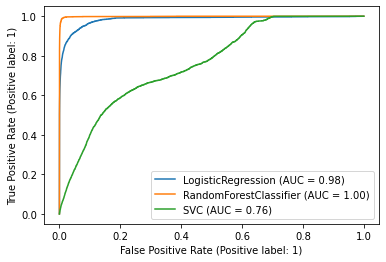

In [46]:
#Plotting AUC curves:
disp = plot_roc_curve(lg,x_train_rs,y_train_rs)
plot_roc_curve(rf,x_train_rs,y_train_rs, ax=disp.ax_)
plot_roc_curve(svc,x_train_rs,y_train_rs, ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(lg,x_test,y_test)
plot_roc_curve(rf,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(svc,x_test,y_test, ax=disp1.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show

In [47]:
#Selecting Random Forest for prediction/fraud detection as it has 
# 1. The best accuracy 
# 2. Less number of False Postives and False Negitves
# 3. Most AUC

In [48]:
# Saving Model
import pickle
filename= 'FraudDect.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [49]:
#Prediction
a= np.array(y_test)
predicted=np.array (rf.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1908781,0,0
1908782,0,0
1908783,0,0
1908784,0,0


In [50]:
# Due to time constraint havent done hyperparameter tunning